In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [151]:
df = pd.read_csv('AreaData.csv')

In [152]:
df

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com..."
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th..."
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist..."
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou..."
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2015-11-14,109.0,"ASSAULT 2,1,UNCLASSIFIED",PL 1200501,F,K,83,0.0,25-44,F,WHITE HISPANIC,1006376.0,192043.0,40.693771,-73.920213,2015,"119, Grove Street, Brooklyn, Kings County, Cit..."
5462,2018-07-03,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553001,F,K,84,0.0,25-44,M,BLACK,989003.0,192413.0,40.694813,-73.982861,2018,"176, Johnson Street, Brooklyn Navy Yard, Brook..."
5463,2015-05-05,478.0,"THEFT OF SERVICES, UNCLASSIFIED",PL 1651503,M,Q,112,0.0,18-24,M,BLACK,1031029.0,199612.0,40.714450,-73.831259,2015,"Kew Gardens-Union Turnpike (E,F), 80th Road, K..."
5464,2006-06-23,905.0,"INTOXICATED DRIVING,ALCOHOL",VTL11920M2,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,985110.0,215630.0,40.758539,-73.996897,2006,"West 40th Street, Hell's Kitchen, Manhattan, N..."


In [153]:
df['pin_code'] = df['area_name'].str.extract(r'(\b\d{5}\b)')

In [154]:
df['pin_code'] = pd.to_numeric(df['pin_code'], errors='coerce')

In [155]:
df.head()

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name,pin_code
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com...",10010.0
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th...",10458.0
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist...",11225.0
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou...",10465.0
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St...",10314.0


In [156]:
df['pd_cd'].value_counts()

pd_cd
101.0    456
567.0    437
478.0    313
511.0    308
339.0    236
        ... 
899.0      1
254.0      1
170.0      1
401.0      1
477.0      1
Name: count, Length: 152, dtype: int64

In [157]:
len(df['pd_desc'].unique())

188

In [158]:
df.columns

Index(['arrest_date', 'pd_cd', 'pd_desc', 'law_code', 'law_cat_cd',
       'arrest_boro', 'arrest_precinct', 'jurisdiction_code', 'age_group',
       'perp_sex', 'perp_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'arrest_year', 'area_name', 'pin_code'],
      dtype='object')

In [159]:
df2 = df.drop(columns = ['arrest_date','area_name','x_coord_cd','y_coord_cd','latitude','longitude'])

In [160]:
df2['pd_desc'] = df2['pd_desc'].str.split().str.get(0)

In [161]:
df2['pd_desc'].unique()

array(['MURDER,UNCLASSIFIED', 'TAX', 'BRIBERY,PUBLIC', 'LARCENY,GRAND',
       'ASSAULT', 'THEFT', 'DISORDERLY', 'STOLEN', 'CHILD,', 'CONTROLLED',
       'DRUG', 'LARCENY,PETIT', 'TRESPASS', 'NY',
       'FORGERY,ETC.,UNCLASSIFIED-FELONY', 'ALCOHOLIC', 'PUBLIC',
       'MARIJUANA,', 'RESISTING', 'BURGLARS', 'TRAFFIC,UNCLASSIFIED',
       'AGGRAVATED', 'INTOXICATED', 'WEAPONS', 'LIGHTS,IMPROPER',
       'IMPAIRED', 'BURGLARY,UNCLASSIFIED,UNKNOWN',
       'FORGERY,ETC.,UNCLASSIFIED-FELO', 'MENACING,UNCLASSIFIED',
       'ROBBERY,UNCLASSIFIED,OPEN', 'GAMBLING', 'BAIL', 'JOSTLING',
       'MISCHIEF,CRIMINAL', 'MISCHIEF,CRIMINAL,', 'SEXUAL', 'IDENTITY',
       'WEAPONS,', 'TAMPERING', 'CONTEMPT,CRIMINAL', 'RIOT',
       'ADM.CODE,UNCLASSIFIED', 'ROBBERY,OPEN', 'PROSTITUTION',
       'LEWDNESS,PUBLIC', 'PROSTITUTION,', 'RECKLESS',
       'FORGERY,ETC.-MISD.', 'UNAUTHORIZED', 'OBSTR', 'CRIMINAL',
       'CONSPIRACY', 'BURGLARY,RESIDENCE,NIGHT', 'LEAVING', 'UNLICENSED',
       'LOITERING', 'IM

In [162]:
df2['law_code'] = df2['law_code'].str[:3]

In [163]:
df2.value_counts()


pd_cd  pd_desc                    law_code  law_cat_cd  arrest_boro  arrest_precinct  jurisdiction_code  age_group  perp_sex  perp_race       arrest_year  pin_code
922.0  TRAFFIC,UNCLASSIFIED       VTL       M           B            52               0.0                25-44      M         WHITE HISPANIC  2013         10468.0     2
748.0  CONTEMPT,CRIMINAL          PL        M           Q            106              0.0                25-44      M         BLACK           2018         11417.0     2
490.0  STOLEN                     PL        M           M            13               0.0                18-24      F         BLACK           2007         10011.0     2
922.0  TRAFFIC,UNCLASSIFIED       VTL       M           M            7                0.0                25-44      M         WHITE HISPANIC  2019         10002.0     2
567.0  MARIJUANA,                 PL        M           M            25               0.0                25-44      M         BLACK           2011         10035

In [164]:
desc_value_counts = df2['pin_code'].value_counts()
values_to_remove = desc_value_counts[desc_value_counts < 20].index
df2 = df2[~df2['pin_code'].isin(values_to_remove)]

In [165]:
df2['pin_code'].value_counts()

pin_code
11207.0    119
11212.0    105
10029.0     99
10451.0     88
10468.0     88
          ... 
11230.0     22
11211.0     21
11412.0     21
10012.0     21
11375.0     21
Name: count, Length: 94, dtype: int64

In [166]:
col = ['pd_desc','law_code', 'pd_cd','jurisdiction_code']
for i in col:
    desc_value_counts = df2[i].value_counts()
    values_to_remove = desc_value_counts[desc_value_counts < 5].index
    df2 = df2[~df2[i].isin(values_to_remove)]

In [167]:
df2

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,arrest_year,pin_code
0,139.0,"MURDER,UNCLASSIFIED",PL,F,M,13,0.0,25-44,M,BLACK,2017,10010.0
1,809.0,TAX,TAX,M,B,52,0.0,45-64,M,BLACK,2010,10458.0
2,760.0,"BRIBERY,PUBLIC",PL,F,K,71,0.0,18-24,M,BLACK,2015,11225.0
3,439.0,"LARCENY,GRAND",PL,F,B,45,0.0,25-44,M,BLACK HISPANIC,2007,10465.0
4,101.0,ASSAULT,PL,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,2017,10314.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5459,101.0,ASSAULT,PL,M,B,46,0.0,45-64,F,BLACK HISPANIC,2008,10457.0
5461,109.0,ASSAULT,PL,F,K,83,0.0,25-44,F,WHITE HISPANIC,2015,11221.0
5462,439.0,"LARCENY,GRAND",PL,F,K,84,0.0,25-44,M,BLACK,2018,11201.0
5464,905.0,INTOXICATED,VTL,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,2006,10018.0


In [168]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df2.columns:
    df2[i] = label.fit_transform(df2[i])

In [169]:
df2

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,arrest_year,pin_code
0,8,31,4,0,2,6,0,1,1,2,11,4
1,67,46,5,2,0,32,0,2,1,2,4,36
2,61,5,4,0,1,42,0,0,1,2,9,68
3,25,23,4,0,0,26,0,1,1,3,1,42
4,0,3,4,2,4,70,0,1,1,1,11,28
...,...,...,...,...,...,...,...,...,...,...,...,...
5459,0,3,4,2,0,27,0,2,0,3,2,35
5461,3,3,4,0,1,51,0,1,0,6,9,65
5462,25,23,4,0,1,52,0,1,1,2,12,51
5464,73,22,6,2,2,5,0,0,1,1,0,10


In [170]:
df2['law_code'].value_counts()

law_code
4    3872
6     396
3     213
5      14
0       8
2       6
1       5
Name: count, dtype: int64

In [171]:
y = df2[['jurisdiction_code']]
x = df2.drop(columns = ['jurisdiction_code'])

In [206]:
y

,jurisdiction_code
0,0
1,0
2,0
3,0
4,0
...,...
5459,0
5461,0
5462,0
5464,0


In [172]:
y.value_counts()

jurisdiction_code
0                    3763
1                     386
2                     265
3                      38
8                      32
4                      13
7                       7
5                       5
6                       5
Name: count, dtype: int64

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [174]:
common_indices = set(X_train.index) & set(X_test.index)

if len(common_indices) == 0:
    print("Training and test datasets are disjoint.")
else:
    print("Training and test datasets have overlapping data points.")

Training and test datasets are disjoint.


In [175]:
X_train

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,arrest_year,pin_code
1172,62,36,4,0,2,2,0,1,6,8,5
1163,55,17,4,0,2,14,1,0,2,12,24
2062,68,32,6,0,1,47,0,1,2,10,73
2071,70,32,3,3,2,2,1,1,2,7,6
4847,38,11,4,2,0,32,1,1,6,5,45
...,...,...,...,...,...,...,...,...,...,...,...
1276,73,22,6,2,3,58,2,1,1,14,89
3955,44,27,4,2,1,49,0,1,2,12,54
2010,22,24,4,2,1,36,0,1,2,8,74
3155,64,12,4,0,0,28,4,0,2,16,43


In [176]:
X_test

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,arrest_year,pin_code
1429,0,3,4,2,2,12,2,1,6,10,16
4063,74,48,6,2,2,14,0,1,6,4,32
3018,44,27,4,2,2,12,1,1,2,11,16
3948,44,27,4,2,1,47,2,1,2,4,62
3387,0,3,4,2,1,40,2,1,2,13,76
...,...,...,...,...,...,...,...,...,...,...,...
3142,23,41,4,0,2,18,4,1,2,1,17
1236,38,11,4,2,0,24,1,1,2,8,47
1694,0,3,4,2,0,21,0,0,6,5,32
3197,22,24,4,2,3,65,1,1,1,13,83


In [177]:
y_train

,jurisdiction_code
1172,1
1163,0
2062,0
2071,0
4847,0
...,...
1276,0
3955,0
2010,0
3155,0


In [178]:
y_test

,jurisdiction_code
1429,2
4063,4
3018,2
3948,0
3387,0
...,...
3142,0
1236,2
1694,0
3197,0


In [179]:
from sklearn.naive_bayes import MultinomialNB
cla = MultinomialNB()

In [180]:
cla.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [181]:
y_pred = cla.predict(X_test)

In [182]:
y_test.values

array([[2],
       [4],
       [2],
       ...,
       [0],
       [0],
       [0]])

In [183]:
y_pred

array([0, 4, 1, ..., 0, 0, 1])

In [184]:
cm = confusion_matrix(y_test.values, y_pred)

In [185]:
cla.score(X_test,y_test)

0.5473870682019486

In [186]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7986827667238422
Recall: 0.5473870682019486
F1 Score: 0.6407900725442754


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


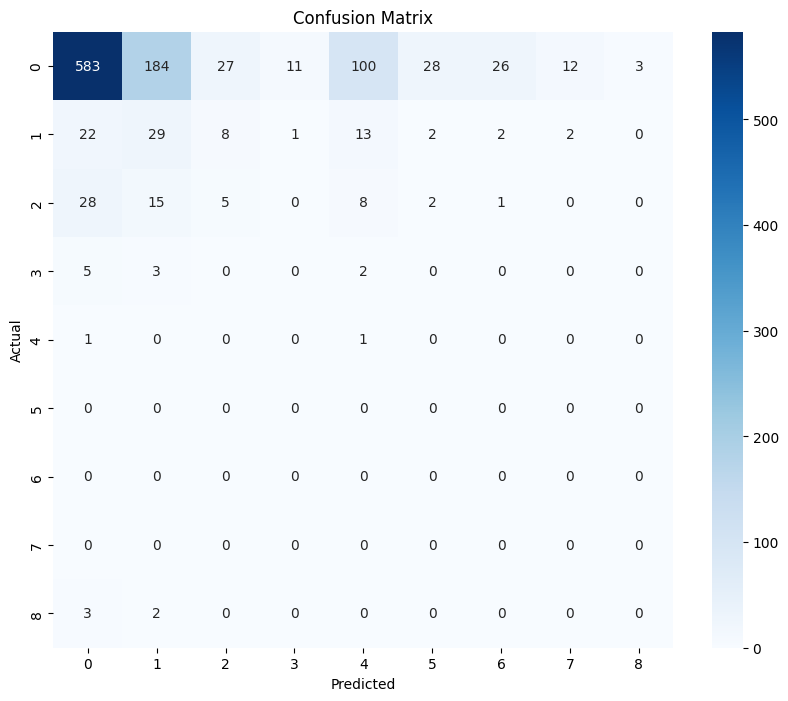

In [187]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [188]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [189]:
dt.score(X_test,y_test)

0.8139946855624446

In [190]:
y_pred = dt.predict(X_test)

In [191]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8334472588182561
Recall: 0.8139946855624446
F1 Score: 0.8230917235718669


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [192]:
cdt = confusion_matrix(y_test.values, y_pred)

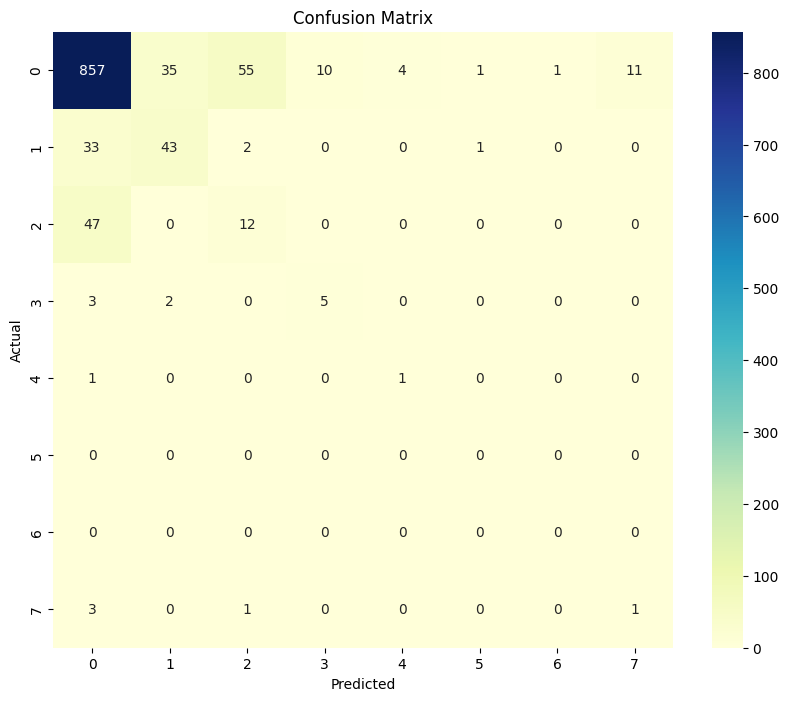

In [193]:
plt.figure(figsize=(10, 8))
sns.heatmap(cdt, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

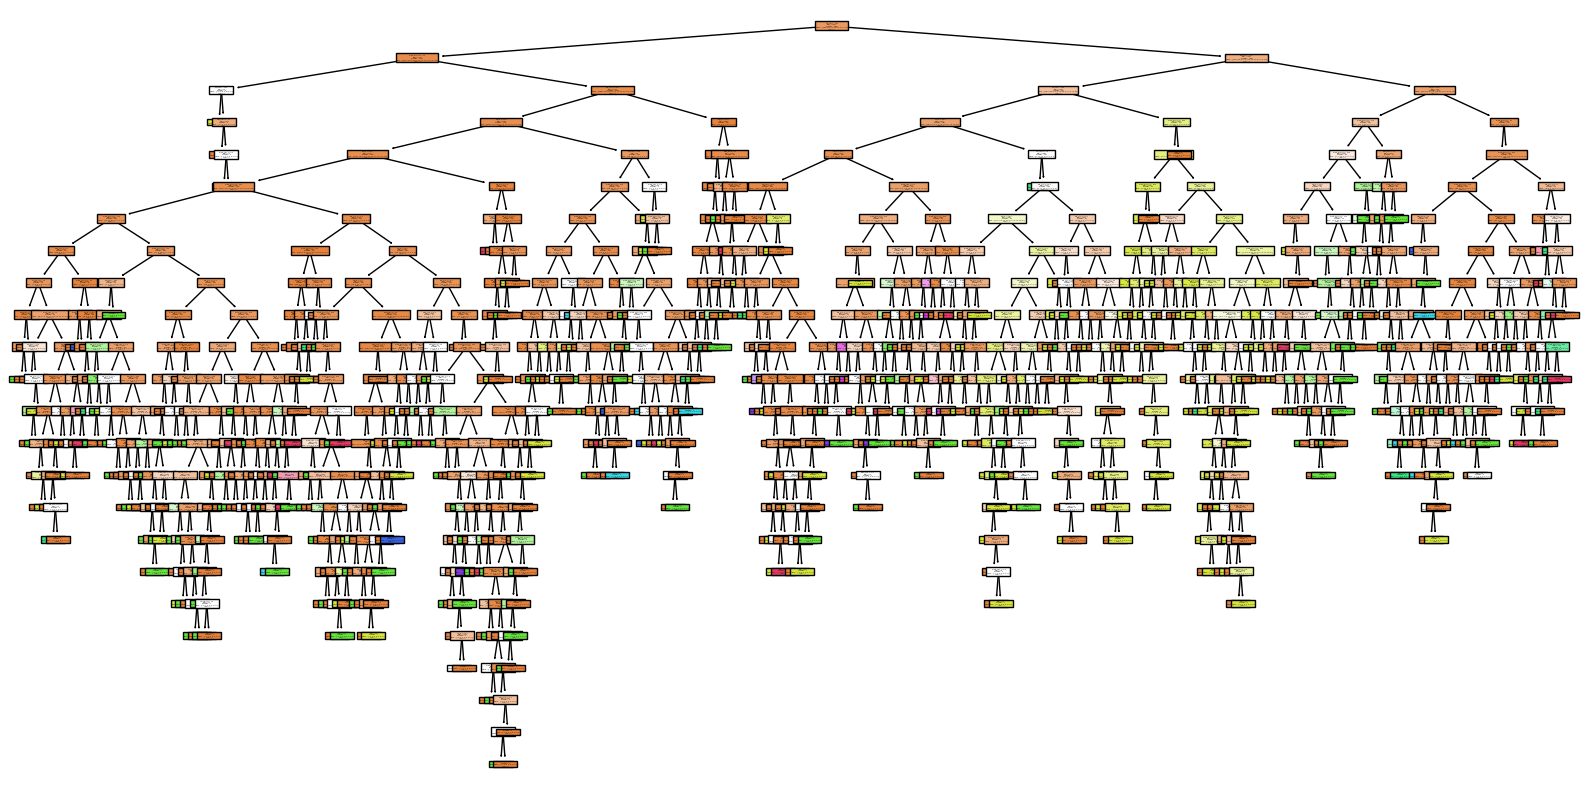

In [224]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=y.squeeze().unique().astype(str))
plt.show()

In [232]:
dt1 = DecisionTreeClassifier(max_depth=1)
dt2 = DecisionTreeClassifier(max_depth=3)
dt3 = DecisionTreeClassifier(max_depth=5)

In [233]:
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [234]:
y_pred1 = dt1.predict(X_test)
y_pred2 = dt2.predict(X_test)
y_pred3 = dt3.predict(X_test)

Text(0.5, 1.0, 'Decision Tree - Model 1 (Max Depth = 1)')

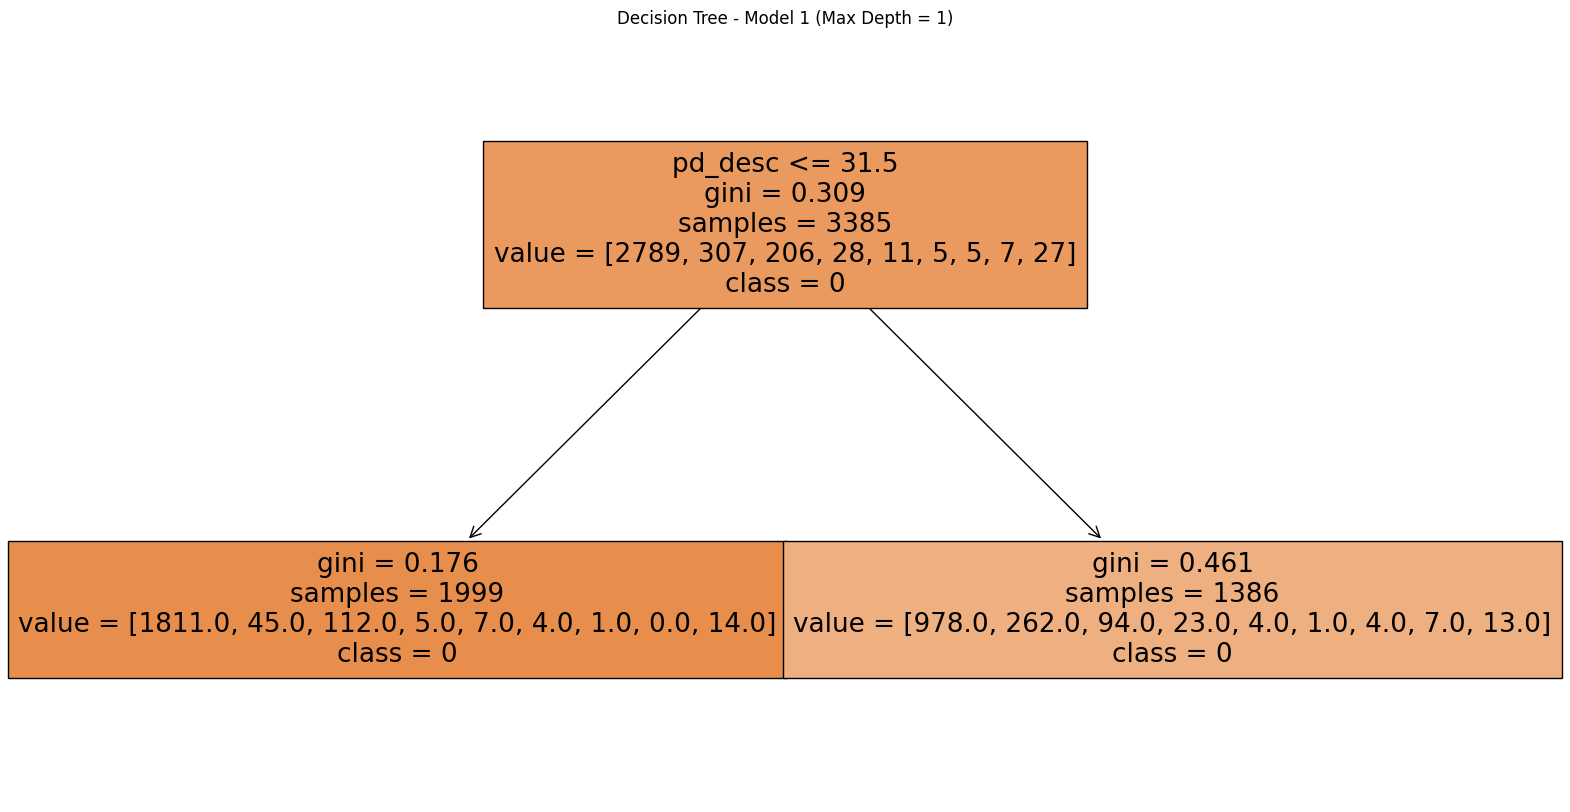

In [238]:
plt.figure(figsize=(20,10))
plot_tree(dt1, filled=True, feature_names=x.columns, class_names=y.squeeze().unique().astype(str))
plt.title("Decision Tree - Model 1 (Max Depth = 1)")

Text(0.5, 1.0, 'Decision Tree - Model 2 (Max Depth = 3)')

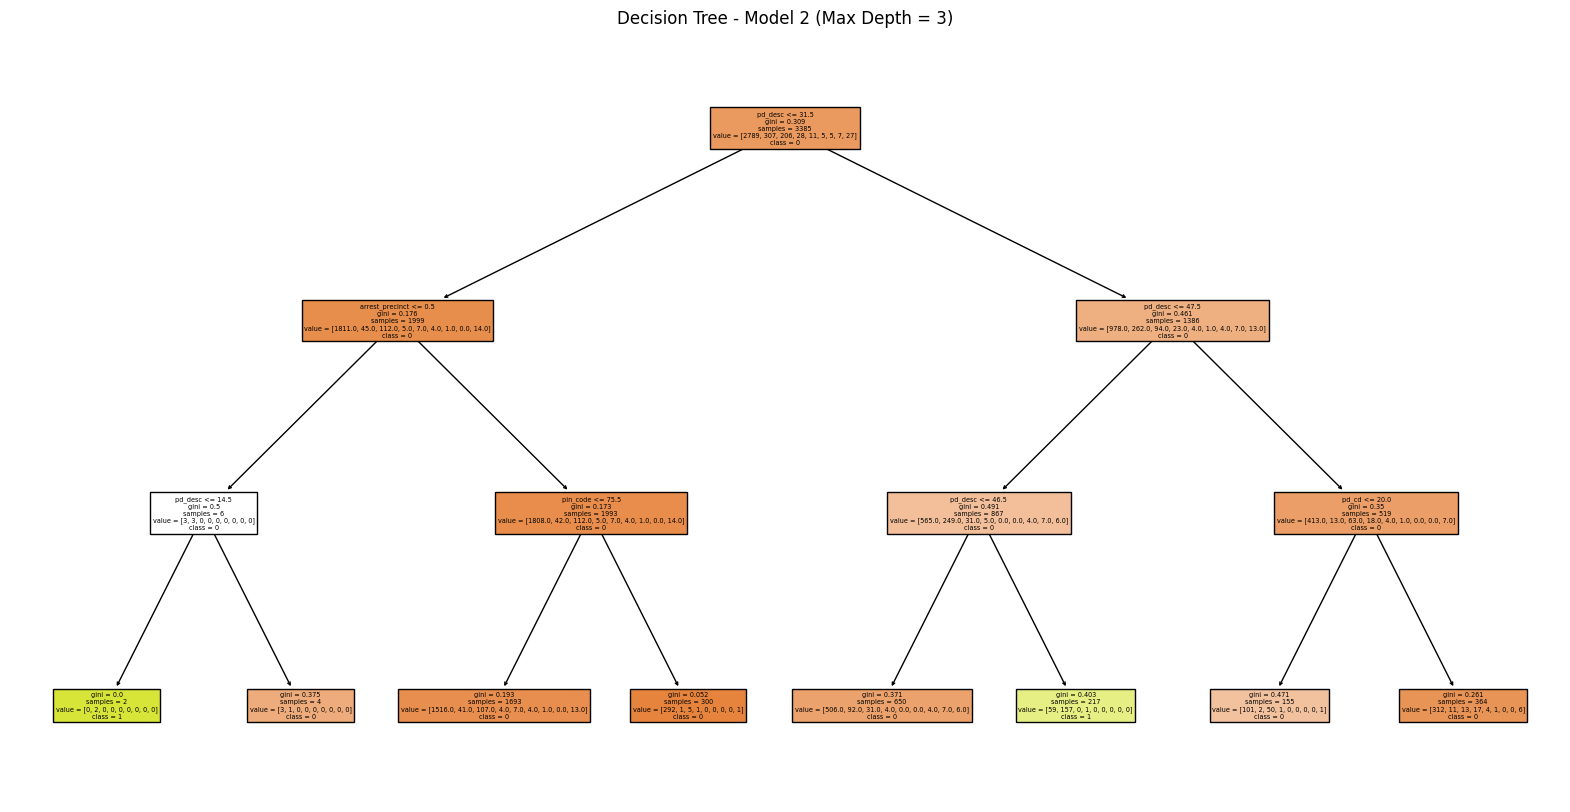

In [239]:
plt.figure(figsize=(20,10))
plot_tree(dt2, filled=True, feature_names=x.columns, class_names=y.squeeze().unique().astype(str))
plt.title("Decision Tree - Model 2 (Max Depth = 3)")

Text(0.5, 1.0, 'Decision Tree - Model 3 (Max Depth = 5)')

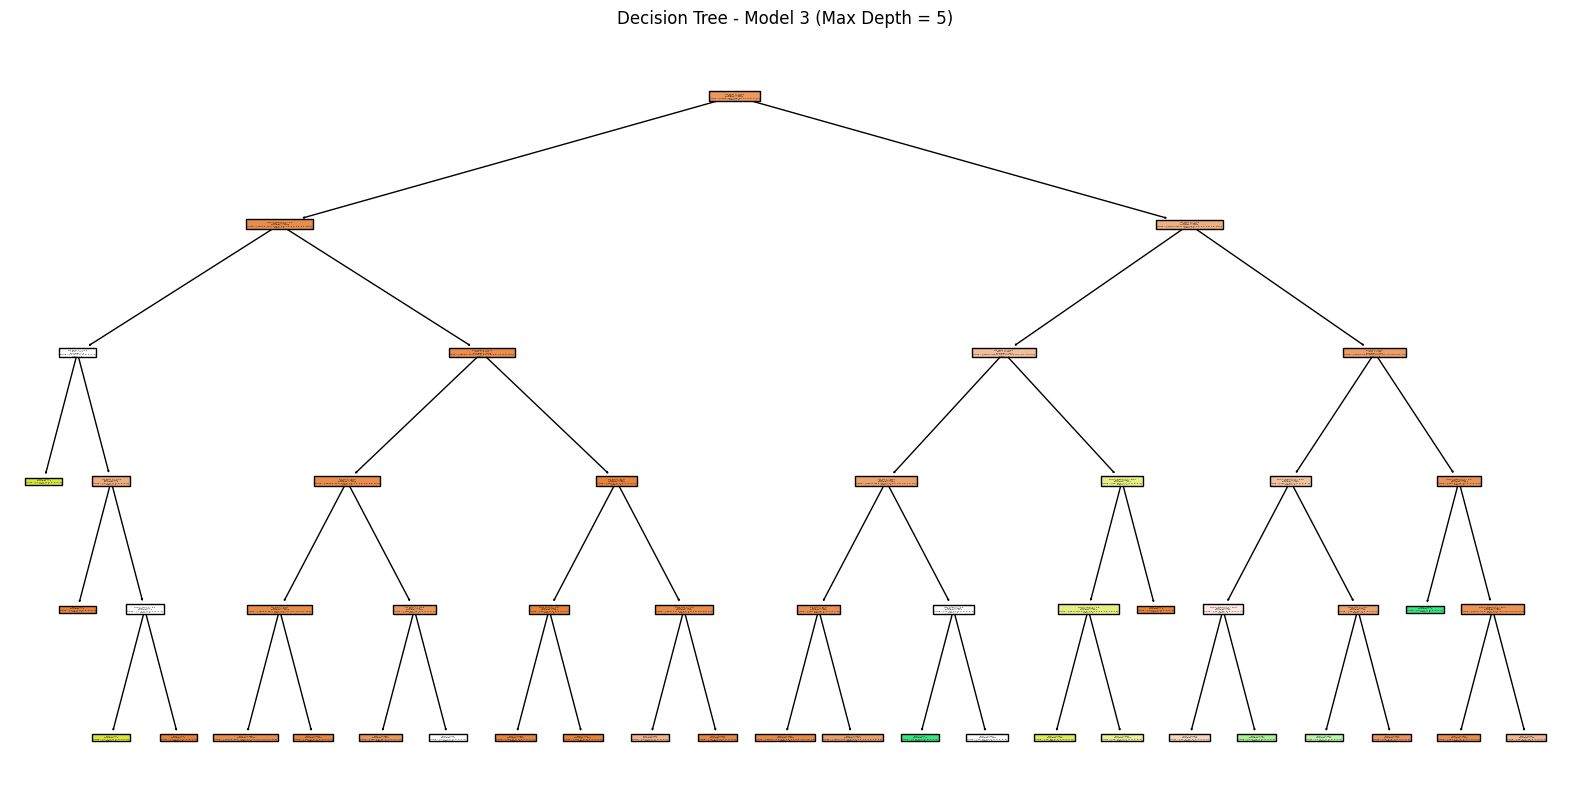

In [240]:
plt.figure(figsize=(20,10))
plot_tree(dt3, filled=True, feature_names=x.columns, class_names=y.squeeze().unique().astype(str))
plt.title("Decision Tree - Model 3 (Max Depth = 5)")